<a href="https://colab.research.google.com/github/joshikavita01/streamlit-demo/blob/master/Assignment3_Ques2(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')
import math

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
lfw_data = "/content/gdrive/MyDrive/lfw.tgz"

In [ ]:
!tar -xzvf "/content/gdrive/MyDrive/lfw.tgz" -C "/content/" 

Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Ai

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
imgg = cv2.imread('/content/lfw/Chyung_Dai-chul/Chyung_Dai-chul_0001.jpg')
#img = getLBPimage(imgg)
gray_image = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
imgLBP = np.zeros_like(gray_image)
neighboor = 3 
for ih in range(0,imgg.shape[0] - neighboor):
  for iw in range(0,imgg.shape[1] - neighboor):
    img= gray_image[ih:ih+neighboor,iw:iw+neighboor]
    center       = img[1,1]
    img01        = (img >= center)*1.0
    img01_vector = img01.T.flatten()
    img01_vector = np.delete(img01_vector,4) 
    where_img01_vector = np.where(img01_vector)[0]
    if len(where_img01_vector) >= 1:
      num = np.sum(2**where_img01_vector)
    else:
      num = 0
    imgLBP[ih+1,iw+1] = num
imgLBP

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255,   0,   0],
       [  0, 255, 255, ..., 255,   0,   0],
       ...,
       [  0,  64,   0, ...,   7,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

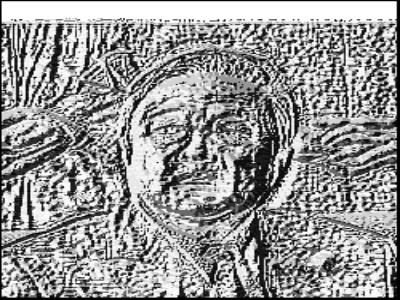

In [ ]:
imS = cv2.resize(imgLBP, (400, 300)) 
cv2_imshow(imS)

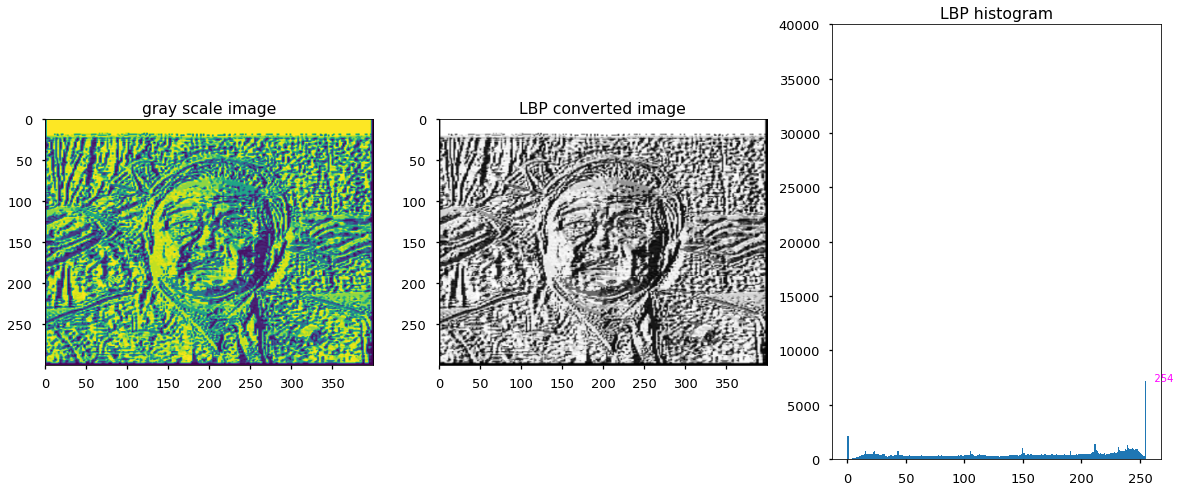

In [ ]:
#img_path = cv2.imread('/content/lfw/Chyung_Dai-chul/Chyung_Dai-chul_0001.jpg')
imgLBP    = imS
vecimgLBP = imgLBP.flatten()
fig = plt.figure(figsize=(20,8))
ax  = fig.add_subplot(1,3,1)
ax.imshow(imS)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
ax.set_ylim(0,40000)
lbp = lbp[:-1]
    ## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
  ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()
